Download Dataset

In [ ]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
  -O /tmp/Chessman-image-dataset.zip

--2024-04-06 12:35:27--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2024-04-06 12:35:27--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   203MB/s    in 

 Create a directory for our dataset to be used in ImageDataGenerator

In [ ]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    zoom_range = 0.2,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.1
)

split the dataset into train and validation data

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 8,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 16,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2

model = tf.keras.models.Sequential([
    # Implement Transfer Learning
    ResNet152V2(weights = "imagenet", include_top = False, input_tensor = Input(shape = (150, 150, 3))),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'softmax')
])

model.layers[0].trainable = False

234545216/234545216 [==============================] - 2s 0us/step


In [ ]:
model.compile(optimizer=tf.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(train_generator, validation_data=validation_generator, epochs=50, verbose=2)

Epoch 1/50
63/63 - 173s - loss: 7.9055 - accuracy: 0.4529 - val_loss: 3.0817 - val_accuracy: 0.5385 - 173s/epoch - 3s/step
Epoch 2/50
63/63 - 160s - loss: 1.7198 - accuracy: 0.6533 - val_loss: 2.0805 - val_accuracy: 0.5769 - 160s/epoch - 3s/step
Epoch 3/50
63/63 - 166s - loss: 1.1406 - accuracy: 0.7234 - val_loss: 0.9520 - val_accuracy: 0.7115 - 166s/epoch - 3s/step
Epoch 4/50
63/63 - 164s - loss: 0.8507 - accuracy: 0.7776 - val_loss: 0.6857 - val_accuracy: 0.8269 - 164s/epoch - 3s/step
Epoch 5/50
63/63 - 164s - loss: 0.6510 - accuracy: 0.7996 - val_loss: 0.8178 - val_accuracy: 0.7115 - 164s/epoch - 3s/step
Epoch 6/50
63/63 - 163s - loss: 0.6623 - accuracy: 0.8377 - val_loss: 0.7630 - val_accuracy: 0.7500 - 163s/epoch - 3s/step
Epoch 7/50
63/63 - 169s - loss: 0.5350 - accuracy: 0.8737 - val_loss: 1.0842 - val_accuracy: 0.7115 - 169s/epoch - 3s/step
Epoch 8/50
63/63 - 157s - loss: 0.5946 - accuracy: 0.8477 - val_loss: 0.7322 - val_accuracy: 0.7885 - 157s/epoch - 2s/step
Epoch 9/50
63/63

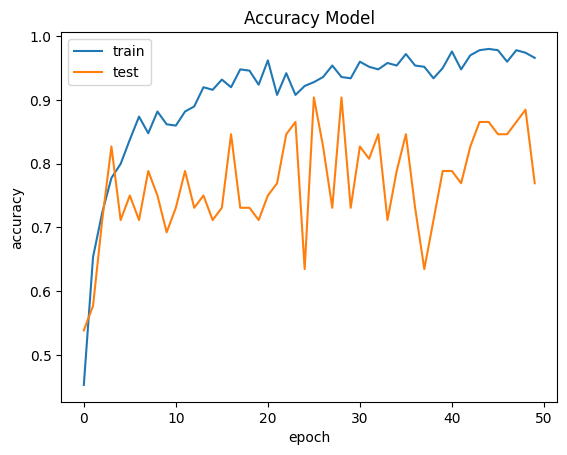

In [9]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

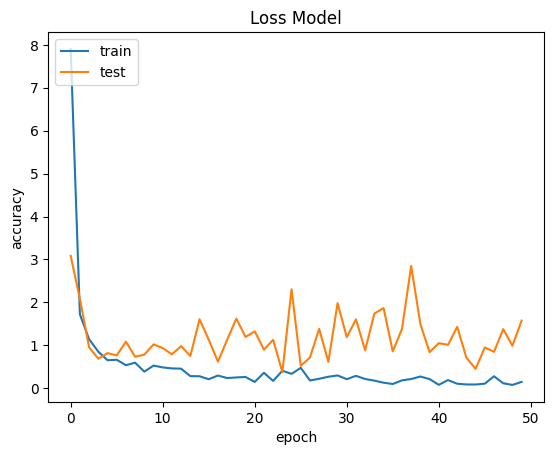

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()